# 캐나다(CAvideos)와 미국(USvideos)의 자료 이용

## 1 . 좋아요 수(likes), 싫어요 수(dislikes), 조회수(views)의 관계 알아보기

In [1]:
import pandas as pd
import numpy as np

CA = pd.read_csv('CAvideos.csv') 
US = pd.read_csv('USvideos.csv')

In [2]:
print(CA.shape)
print(US.shape)

(40881, 16)
(40949, 16)


In [3]:
#CA, US 결합
CA_US = pd.concat([CA, US]) 
CA_US.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [4]:
print(CA_US.shape)

(81830, 16)


In [5]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

### 1.1 캐나다 조회수(views), 좋아요 수(likes)의 관계 확인하기
- 캐나다 조회수(views), 좋아요 수(likes)의 그래프
- 조회수(views) 하위 200개의 좋아요 수(likes)와 조회수(views) 관계

Text(0, 0.5, 'Likes')

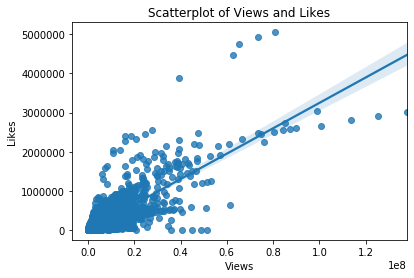

In [6]:
Cx=plt.subplots()
Cx=sns.regplot(x='views',y='likes',data=CA)
Cx.set_title('Scatterplot of Views and Likes')
Cx.set_xlabel('Views')
Cx.set_ylabel('Likes')

In [7]:
#조회수(views) 하위 200개의좋아요 수(likes)와 조회수(views) 관계
L_CA=CA.loc[:,['video_id','views','likes']]
CA_views=L_CA.sort_values(by=['views'],ascending=True)
CA_likes=L_CA.sort_values(by=['likes'],ascending=True)
b_CA=pd.DataFrame(CA_views.head(200)) 

Text(0, 0.5, 'Likes')

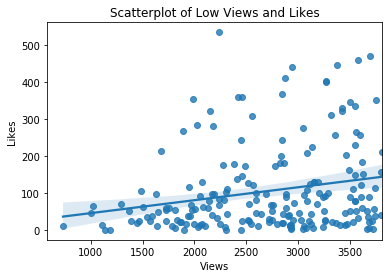

In [9]:
Cx=plt.subplots()
Cx=sns.regplot(x='views',y='likes',data=b_CA)
Cx.set_title('Scatterplot of Low Views and Likes')
Cx.set_xlabel('Views')
Cx.set_ylabel('Likes')

- 대체로 상관관계를 보이지만 조회수가 낮을 경우 상관관계가 약해진다.

### 1.2 캐나다 조회수(views), 싫어요 수(dislikes) 관계
- 캐나다 조회수(views), 싫어요 수(dislikes)의 그래프
- 조회수(views) 하위 200개의 싫어요 수(dislikes)와 조회수(views) 관계

Text(0, 0.5, 'Dislikes')

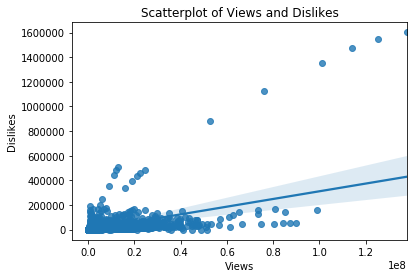

In [10]:
Cx=plt.subplots()
Cx=sns.regplot(x='views',y='dislikes',data=CA)
Cx.set_title('Scatterplot of Views and Dislikes')
Cx.set_xlabel('Views')
Cx.set_ylabel('Dislikes')

In [11]:
#조회수(views) 하위 200개의 싫어요 수(dislikes)와 조회수(views) 관계
D_CA=CA.loc[:,['video_id','views','dislikes']]
CA_views_b=D_CA.sort_values(by=['views'],ascending=True)
CA_likes_b=D_CA.sort_values(by=['dislikes'],ascending=True)
D_CA_b=pd.DataFrame(CA_views_b.head(200))

Text(0, 0.5, 'Dislikes')

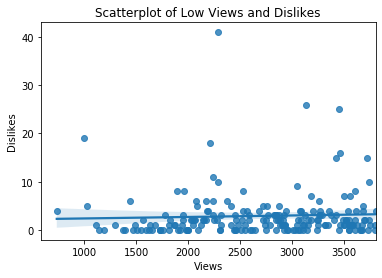

In [12]:
Cx=plt.subplots()
Cx=sns.regplot(x='views',y='dislikes',data=D_CA_b)
Cx.set_title('Scatterplot of Low Views and Dislikes')
Cx.set_xlabel('Views')
Cx.set_ylabel('Dislikes')

- 대체로 상관관계를 보이지만 조회수가 낮을 경우 상관관계가 약해진다.

### 1.3 캐나다 좋아요 수(likes), 싫어요 수(dislikes) 관계

Text(0, 0.5, 'Dislikes')

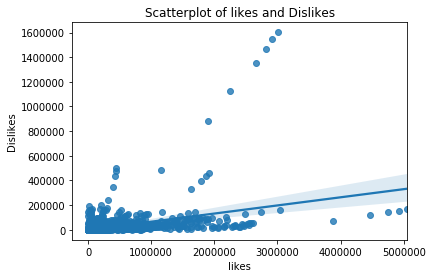

In [15]:
Cx=plt.subplots()
Cx=sns.regplot(x='likes',y='dislikes',data=CA)
Cx.set_title('Scatterplot of likes and Dislikes')
Cx.set_xlabel('likes')
Cx.set_ylabel('Dislikes')

### 1.4 미국 조회수(views), 좋아요 수(likes) 관계
- 미국 조회수(views), 좋아요 수(likes)의 그래프
- 조회수(views) 하위 200개의 좋아요 수(likes)와 조회수(views) 관계

Text(0, 0.5, 'Likes')

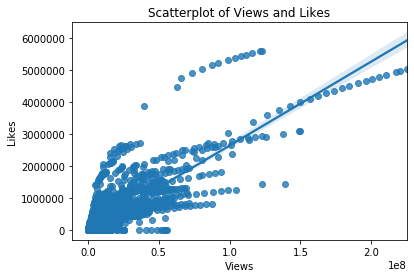

In [16]:
Ux=plt.subplots()
Ux=sns.regplot(x='views',y='likes',data=US)
Ux.set_title('Scatterplot of Views and Likes')
Ux.set_xlabel('Views')
Ux.set_ylabel('Likes')

In [17]:
#조회수(views) 하위 200개의 좋아요 수(likes)와 조회수(views) 관계
L_US=US.loc[:,['video_id','views','likes']]
US_views=L_US.sort_values(by=['views'],ascending=True)
US_likes=L_US.sort_values(by=['likes'],ascending=True)
b_US=pd.DataFrame(US_views.head(200)) 

Text(0, 0.5, 'Likes')

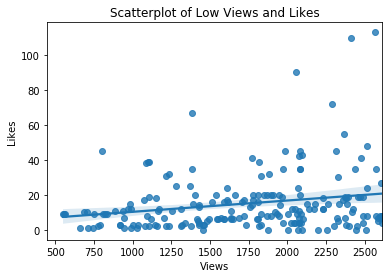

In [18]:
Ux=plt.subplots()
Ux=sns.regplot(x='views',y='likes',data=b_US)
Ux.set_title('Scatterplot of Low Views and Likes')
Ux.set_xlabel('Views')
Ux.set_ylabel('Likes')

- 대체로 상관관계를 보이지만 조회수가 낮을 경우 상관관계가 약해진다.

### 1.5 미국 조회수(views), 싫어요 수(dislikes) 관계
- 미국 조회수(views), 싫어요 수(dislikes)의 그래프
- 조회수(views) 하위 200개의 싫어요 수(dislikes)와 조회수(views) 관계

Text(0, 0.5, 'Dislikes')

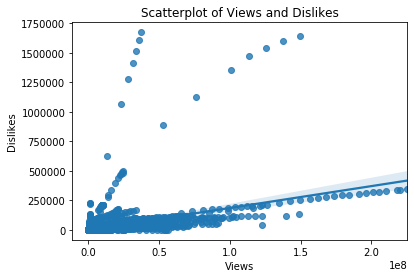

In [19]:
Ux=plt.subplots()
Ux=sns.regplot(x='views',y='dislikes',data=US)
Ux.set_title('Scatterplot of Views and Dislikes')
Ux.set_xlabel('Views')
Ux.set_ylabel('Dislikes')

In [20]:
#조회수(views) 하위 200개의 싫어요 수(dislikes)와 조회수(views) 관계
L_US_a=US.loc[:,['video_id','views','dislikes']]
US_views_a=L_US_a.sort_values(by=['views'],ascending=True)
US_likes_a=L_US_a.sort_values(by=['dislikes'],ascending=True)
b_US_a=pd.DataFrame(US_views_a.head(200)) 

Text(0, 0.5, 'Dislikes')

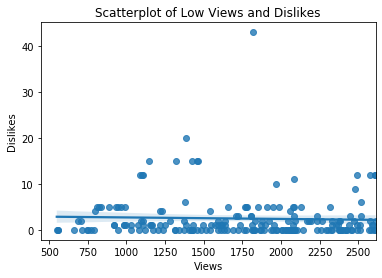

In [21]:
Ux=plt.subplots()
Ux=sns.regplot(x='views',y='dislikes',data=b_US_a)
Ux.set_title('Scatterplot of Low Views and Dislikes')
Ux.set_xlabel('Views')
Ux.set_ylabel('Dislikes')

#### 대체로 상관관계를 보이지만 조회수가 낮을 경우 상관관계가 약해진다.

### 1.6 미국 좋아요 수(likes), 싫어요 수(dislikes) 관계

Text(0, 0.5, 'Dislikes')

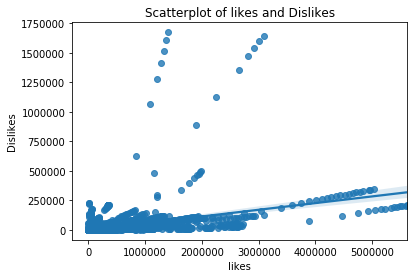

In [22]:
Ux=plt.subplots()
Ux=sns.regplot(x='likes',y='dislikes',data=US)
Ux.set_title('Scatterplot of likes and Dislikes')
Ux.set_xlabel('likes')
Ux.set_ylabel('Dislikes')

### 1.7 미국, 캐나다의 조회수(views), 좋아요 수(likes) 관계
- 미국과 캐나다의 조회수(views), 좋아요 수(dislikes)의 그래프
- 조회수(views) 하위 200개의 싫어요 수(dislikes)와 조회수(views) 관계

Text(0, 0.5, 'Likes')

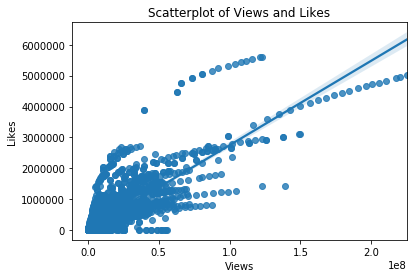

In [24]:
CUx=plt.subplots()
CUx=sns.regplot(x='views',y='likes',data=CA_US)
CUx.set_title('Scatterplot of Views and Likes')
CUx.set_xlabel('Views')
CUx.set_ylabel('Likes')

In [28]:
#조회수(views) 하위 200개의 싫어요 수(dislikes)와 조회수(views) 관계
L_CAUS=CA_US.loc[:,['video_id','views','likes']]
CAUS_views=L_CAUS.sort_values(by=['views'],ascending=True)
CAUS_likes=L_CAUS.sort_values(by=['likes'],ascending=True)
b_CAUS=pd.DataFrame(CAUS_views.head(200)) 

Text(0, 0.5, 'Likes')

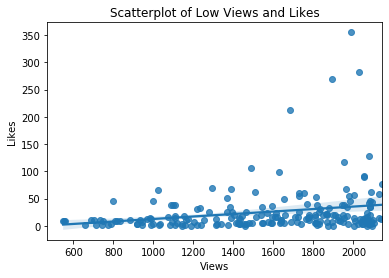

In [29]:
CUx=plt.subplots()
CUx=sns.regplot(x='views',y='likes',data=b_CAUS)
CUx.set_title('Scatterplot of Low Views and Likes')
CUx.set_xlabel('Views')
CUx.set_ylabel('Likes')

- 대체로 상관관계를 보이지만 조회수가 낮을 경우 상관관계가 약해진다.

### 1.8 미국, 캐나다 조회수(views), 싫어요 수(dislikes) 관계
- 미국과 캐나다의 조회수(views), 싫어요 수(dislikes)의 그래프
- 조회수(views) 하위 200개의 싫어요 수(dislikes)와 조회수(views) 관계

Text(0, 0.5, 'Dislikes')

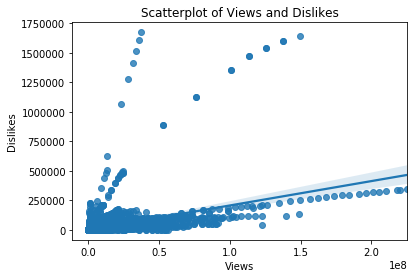

In [30]:
CUx=plt.subplots()
CUx=sns.regplot(x='views',y='dislikes',data=CA_US)
CUx.set_title('Scatterplot of Views and Dislikes')
CUx.set_xlabel('Views')
CUx.set_ylabel('Dislikes')

In [32]:
#조회수(views) 하위 200개의 싫어요 수(dislikes)와 조회수(views) 관계
L_CAUS_a=CA_US.loc[:,['video_id','views','dislikes']]
CAUS_views_a=L_CAUS_a.sort_values(by=['views'],ascending=True)
CAUS_likes_a=L_CAUS_a.sort_values(by=['dislikes'],ascending=True)
b_CAUS_a=pd.DataFrame(CAUS_views_a.head(200)) 

Text(0, 0.5, 'Dislikes')

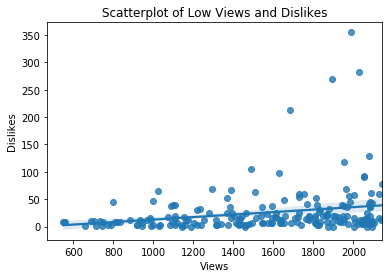

In [33]:
CUx=plt.subplots()
CUx=sns.regplot(x='views',y='likes',data=b_CAUS)
CUx.set_title('Scatterplot of Low Views and Dislikes')
CUx.set_xlabel('Views')
CUx.set_ylabel('Dislikes')

- 대체로 상관관계를 보이지만 조회수가 낮을 경우 상관관계가 약해진다.

## 2. 조회수, 댓글 수가 많은 채널 Top 10의 channel_title 찾아보기

In [34]:
da_CA = CA.loc[:,['channel_title','views','comment_count']]

gr_CA = da_CA.groupby(['channel_title']).sum().reset_index()

ch_CA_views = gr_CA.sort_values(by=["views"],ascending=False)
ch_CA_cc = gr_CA.sort_values(by=["comment_count"],ascending=False)

In [35]:
da_US = US.loc[:,['channel_title','views','comment_count']]

gr_US = da_US.groupby(['channel_title']).sum().reset_index()

ch_US_views = gr_US.sort_values(by=["views"],ascending=False)
ch_US_cc = gr_US.sort_values(by=["comment_count"],ascending=False)

### 2.1 조회수 비교

In [36]:
ch_CA_views10 = ch_CA_views.head(10)
ch_US_views10 = ch_US_views.head(10)

In [37]:
print(ch_CA_views10)
print(ch_US_views10)

                    channel_title       views  comment_count
2422         Marvel Entertainment  1011420205        4123846
3607                     T-Series   799114025        1144248
1101                 Dude Perfect   729916338        2096231
4404            YouTube Spotlight   635976769        5406288
4606                      ibighit   511567918        9156753
2954                    PewDiePie   461700524        3869088
3497  Sony Pictures Entertainment   451188760        1245147
3518                Speed Records   426604974         828275
21               20th Century Fox   419577035         557220
746           ChildishGambinoVEVO   411775069        1545142
                    channel_title       views  comment_count
358           ChildishGambinoVEVO  3758488765       10151289
2094                      ibighit  2235906679       31817464
541                  Dude Perfect  1870085178        4009163
1129         Marvel Entertainment  1808998971        6453560
110              ArianaG

- 두 나라의 조회수 Top 10에는 동일한 채널이 'Marvel Entertainment', 'Dude Perfect', 'ibighit', 'Sony Pictures Entertainment', 'ChildishGambinoVEVO'로 총 5개가 있다.
- 두 나라의 조회수 Top 10 중 동일한 채널의 조회수는 미국이 월등히 높다.

### 2.2 Top 10의 동일 채널에 대한 조회수 그래프

In [38]:
views_5 = pd.DataFrame(
    data={'CA_views':[1011420205,729916338,511567918,451188760,411775069],
          'US_views':[1808998971,1870085178,2235906679,1432374398,3758488765]},
    index=['Marvel','Dude','ibighit','Sony','VEVO'],
    columns=['CA_views','US_views'])

In [39]:
views_5

,CA_views,US_views
Marvel,1011420205,1808998971
Dude,729916338,1870085178
ibighit,511567918,2235906679
Sony,451188760,1432374398
VEVO,411775069,3758488765


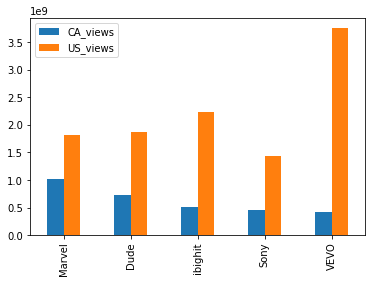

In [40]:
views_5.plot.bar()

### 2.3 댓글 수 비교

In [41]:
print(ch_CA_cc.head(10))
print(ch_US_cc.head(10))

             channel_title       views  comment_count
4606               ibighit   511567918        9156753
4404     YouTube Spotlight   635976769        5406288
2272      Logan Paul Vlogs   242473356        4318383
2422  Marvel Entertainment  1011420205        4123846
2954             PewDiePie   461700524        3869088
1833             Jake Paul   225444096        3000741
1101          Dude Perfect   729916338        2096231
3791    The Game Theorists   155020685        2007590
2958       Philip DeFranco   208288954        1958231
4616            jacksfilms    83933594        1941867
             channel_title       views  comment_count
2094               ibighit  2235906679       31817464
1054      Logan Paul Vlogs   484356303       14870370
358    ChildishGambinoVEVO  3758488765       10151289
2112      jypentertainment  1486972132        7575510
2010     YouTube Spotlight   791388476        6495154
1129  Marvel Entertainment  1808998971        6453560
1530        Safiya Nygaard  

- 두 나라의 댓글 수 Top 10에는 동일한 채널이 'ibighit', 'YouTube Spotlight', 'Logan Paul Vlogs', 'Marvel Entertainment', 'jacksfilms'으로 총 5개가 있다.
- 두 나라의 댓글 수 Top 10 중 동일한 채널의 댓글 수는 모두 미국이 더 많다.

- 조회수, 댓글 수 기준 Top 10에는 캐나다와 미국 모두 공통된 5개의 채널을 가지고 있으며, 해당 값은 미국이 훨씬 크다
- 캐나다의 경우, 조회수와 댓글 수 모두 Top 10에 오른 채널은 4개이다.
- 미국의 경우, 조회수와 댓글 수 모두 Top 10에 오른 채널은 4개이다.

### 2.4 그래프 그리기

In [43]:
cc_5 = pd.DataFrame(
    data={'CA_cc':[9156753,5406288,4318383,4123846,1941867],
          'US_cc':[31817464,6495154,14870370,6453560,4074130]},
    index=['ibighit','YouTube','Vlogs','Marvel','jacksfilms'],
    columns=['CA_cc','US_cc'])

In [44]:
cc_5

,CA_cc,US_cc
ibighit,9156753,31817464
YouTube,5406288,6495154
Vlogs,4318383,14870370
Marvel,4123846,6453560
jacksfilms,1941867,4074130


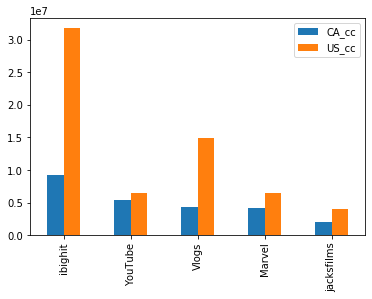

In [45]:
cc_5.plot.bar()

## 3. 조회수(views)와 태그(tag)의 관계 파악하기

### 3.1 태그수(tags_count) 확인 후, 태그 수(tags_count) 열 추가하기
- 캐나다, 미국 자료 합치기
- 사용하고자 하는 변수(views, tags)의 결측값 유무 확인하기
- '|' 를 기준으로 tags수를 확인하고 결과값을 새로운 열(tags_count)에 저장하기

In [47]:
input_fd = open('CAvideos.csv',errors = 'backslashreplace',encoding='utf-8')
CAvideos = pd.read_csv(input_fd)
input_fd = open('USvideos.csv',errors = 'backslashreplace',encoding='utf-8')
USvideos = pd.read_csv(input_fd)

#캐나다, 미국 자료 합치기 
CA_US = pd.concat([CAvideos, USvideos]) 

In [48]:
print(np.count_nonzero(CA_US['tags'].isnull()))
print(np.count_nonzero(CA_US['views'].isnull()))

0
0


In [49]:
#기존 데이터에 태그 수를 계산한 tags_count 열을 추가하기
CA_US['tags_count'] = CA_US['tags'].apply(lambda x: x.count('|') + 1)
CA_US

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,tags_count
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,6
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,11
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,23
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,14
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,14
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,1
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,24
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,22


In [50]:
print(CA_US.iloc[5].tags)
print(CA_US.iloc[5].tags_count)

#DramaAlert|"Drama"|"Alert"|"DramaAlert"|"keemstar"|"youtube news"|"jake paul"|"team 10"|"alissa violet"|"cheated"|"logan paul"|"logan paul alissa violet"|"jake paul alissa violet"|"Martinez Twins"|"left team 10"|"faze banks"|"erika costell"
17


In [51]:
tags_count = CA_US['tags_count']
tags_count

0         6
1        11
2        23
3        14
4        10
         ..
40944    14
40945     1
40946    24
40947    22
40948     4
Name: tags_count, Length: 81830, dtype: int64

### 3.2 조회수(views)와 태그 수(tags_count) 의 상관성 파악하기
- 태그수(tags_count)의 평균 이상의 값을 가진 데이터 출력 후, 조회수(views)와의 관계 파악하기

In [52]:
CA_US_Tags_Over_Mean = CA_US[tags_count > tags_count.mean()]
CA_US_Tags_Over_Mean.shape

(39699, 17)

In [53]:
CA_US_Tags_Over_Mean = CA_US_Tags_Over_Mean.sort_values('tags_count', ascending = False) #태그 수를 기준으로 내림차순 정렬 
CA_US_Tags_subset = CA_US_Tags_Over_Mean.loc[:, ['views', 'tags_count']]
CA_US_Tags_subset

,views,tags_count
19659,1902061,124
19394,970277,123
14326,60379,114
15502,26555,114
9380,18511,114
...,...,...
17841,777835,20
26555,352972,20
17832,1136627,20
12331,630543,20


(100000, 200000000)

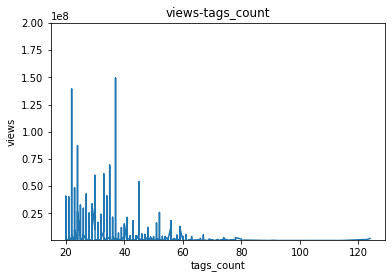

In [56]:
plt.plot(CA_US_Tags_subset['tags_count'],CA_US_Tags_subset['views'])
plt.ylabel('views')
plt.xlabel('tags_count')
plt.title('views-tags_count') 
plt.ylim(100000,200000000)

- 조회수(views)와 태그 수(tags_count)는 서로 유의미한 관계를 갖는다고 볼 수 없다.

## 4. publish time에 따른 월별 업로드 된 동영상의 조회수(views) 분석

In [57]:
CA=pd.read_csv('CAvideos.csv')
US=pd.read_csv('USvideos.csv')

In [58]:
# CA, US 데이터 행기준 연결하기
CA_US = pd.concat([CA, US])

In [59]:
# 월만 추출한 열 추가
CA_US['publish_month'] = CA_US['publish_time'].apply(lambda date : date.split('-')[1])

# 년도만 추출한 열 추가
CA_US['publish_year'] = CA_US['publish_time'].apply(lambda date : date.split('-')[0])
CA_US

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_month,publish_year
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,11,2017
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,11,2017
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,11,2017
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,11,2017
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,11,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,05,2018
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,05,2018
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,05,2018
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,05,2018


In [60]:
view_mean_by_month = CA_US.groupby('publish_month')['views'].mean()
view_mean_by_month

publish_month
01    1.047319e+06
02    1.293637e+06
03    1.566777e+06
04    2.555563e+06
05    3.154241e+06
06    1.654533e+06
07    2.104679e+05
08    1.068633e+05
09    1.783865e+05
10    3.717055e+05
11    1.300564e+06
12    1.261827e+06
Name: views, dtype: float64

### 4.1 조회수 평균이 높은 년도, 월 확인

In [61]:
# 월별 조회수 평균이 높은 순으로 출력
view_mean_by_month.sort_values(ascending=False)

publish_month
05    3.154241e+06
04    2.555563e+06
06    1.654533e+06
03    1.566777e+06
11    1.300564e+06
02    1.293637e+06
12    1.261827e+06
01    1.047319e+06
10    3.717055e+05
07    2.104679e+05
09    1.783865e+05
08    1.068633e+05
Name: views, dtype: float64

- 월별 조회수 평균은 5월, 4월, 6월, 3월, 11월 순으로 높았다.

In [62]:
#년도, 월별 조회수 평균
view_mean_by_yearmonth = CA_US.groupby(['publish_year', 'publish_month'])['views'].mean()

In [63]:
view_mean_by_yearmonth.sort_values(ascending=False)

publish_year  publish_month
2018          05               3.166437e+06
              04               2.560562e+06
              06               1.667418e+06
              03               1.572076e+06
2017          11               1.303792e+06
                                   ...     
2012          06               6.412000e+03
2016          05               6.145000e+03
2013          09               5.636667e+03
2016          12               4.389500e+03
2009          12               3.068250e+03
Name: views, Length: 71, dtype: float64

- 2018년 5월의 조회수 평균이 가장 높은 것을 확인할 수 있다.

### 4.2 월별 조회수에 대한 여러 그래프 그리기
- 월별 조회수 평균 선 그래프
- 월별 조회수 평균 막대 그래프
- 월별 조회수 그래프

Text(0.5, 0.98, 'views_mean_by_month')

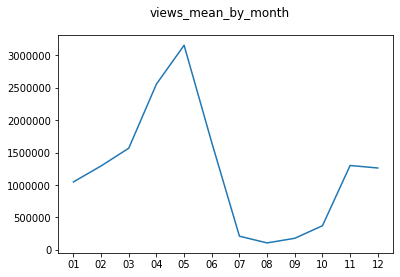

In [64]:
# 월별 조회수 평균 그래프 그리기
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(view_mean_by_month)
fig.suptitle("views_mean_by_month") 

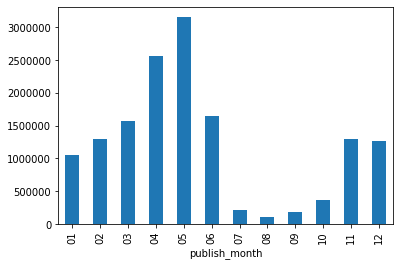

In [65]:
#막대 그래프
view_mean_by_month.plot.bar()

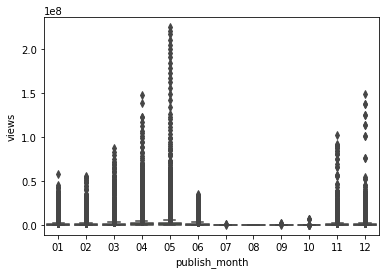

In [66]:
# 각 월별 조회수 boxplot
sns.boxplot(x='publish_month', y='views', data=CA_US)

## 5. 조회수(views)와 좋아요 수(likes)의 합을 기준으로 가장 많이 선호하는 카테고리 

### 5.1 조회수(views)와 좋아요 수(likes)의 합

In [68]:
pr_CA = CA.loc[:,["category_id",'views','likes']]
pr_US = US.loc[:,["category_id","views","likes"]]

cr_CA=CA.views+CA.likes
cr_US=US.views+US.likes

pr_CA["views+likes"]=cr_CA
pr_US["views+likes"]=cr_US

In [69]:
print(pr_CA.head())
print(pr_US.head())

   category_id     views    likes  views+likes
0           10  17158579   787425     17946004
1           23   1014651   127794      1142445
2           23   3191434   146035      3337469
3           24   2095828   132239      2228067
4           10  33523622  1634130     35157752
   category_id    views   likes  views+likes
0           22   748374   57527       805901
1           24  2418783   97185      2515968
2           23  3191434  146033      3337467
3           24   343168   10172       353340
4           24  2095731  132235      2227966


### 5.2 가장 선호하는 카테고리 찾기

In [70]:
pr_CA=pr_CA.reset_index()
pr_US=pr_US.reset_index()

In [71]:
pr_CA.loc[pr_CA["views+likes"].idxmax()]

index               5900
category_id           24
views          137843120
likes            3014479
views+likes    140857599
Name: 5900, dtype: int64

- 조회수(views)와 좋아요수(likes)을 더한 값이 가장 큰 category_id는 24로, 해당 카테고리는 Entertainment이다.

In [72]:
pr_US.loc[pr_US["views+likes"].idxmax()]

index              38547
category_id           10
views          225211923
likes            5023450
views+likes    230235373
Name: 38547, dtype: int64

- 조회수(views)와 좋아요수(likes)을 더한 값이 가장 큰 category_id는 10으로, 해당 카데고리는 Music이다.

### 5.3 두 카테고리의 조회수(views)와 좋아요 수(likes)의 합 비교 그래프

In [73]:
ch_2 = pd.DataFrame({
    "category":['Entertainment','Music'],
    "views+likes":[140857599,230235373]})

ch_2

,category,views+likes
0,Entertainment,140857599
1,Music,230235373


Text(0.5, 0, 'Category')

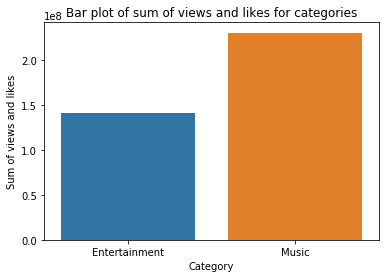

In [74]:
ax = plt.subplots()
ax = sns.barplot(x='category', y='views+likes', data=ch_2)
ax.set_title("Bar plot of sum of views and likes for categories")
ax.set_ylabel("Sum of views and likes")
ax.set_xlabel("Category")

- 캐나다(CAvideos)와 미국(USvideos)에서 가장 선호하는 카테고리는 각각 Entertainment와 Music이고, 해당 조회수(views)와 좋아요수(likes)를 합한 값은 미국이 더 크다.